In [24]:
#import statements
import pymysql
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
db = pymysql.connect("localhost","root","passphrase","sakila" )
cursor = db.cursor()

## Part C, Question 1A

In [15]:
sql = '''
    select
    first_name,
    last_name,
    count(*) as c
from actor a
    join film_actor fa on fa.actor_id = a.actor_id
    join film f on f.film_id = fa.film_id
group by 1, 2
having c > 25
limit 10
'''

/Users/rowena/miniconda3/envs/msca/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


[Text(0,0,'JOHNNY LOLLOBRIGIDA'),
 Text(0,0,'GRACE MOSTEL'),
 Text(0,0,'KARL BERRY'),
 Text(0,0,'UMA WOOD'),
 Text(0,0,'VIVIEN BERGEN'),
 Text(0,0,'CUBA OLIVIER'),
 Text(0,0,'FRED COSTNER'),
 Text(0,0,'HELEN VOIGHT'),
 Text(0,0,'LUCILLE TRACY'),
 Text(0,0,'KIRSTEN PALTROW')]

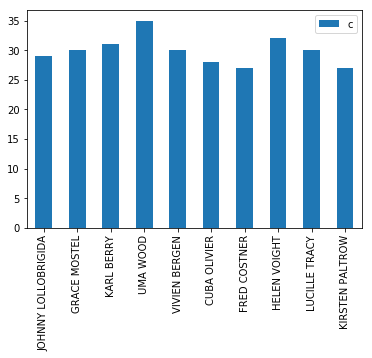

In [26]:
df = pd.read_sql(sql, db)
df.fullname=df.first_name + ' ' + df.last_name
ax = df.plot.bar()
ax.set_xticklabels(df.fullname)

## Part C, Question 1d

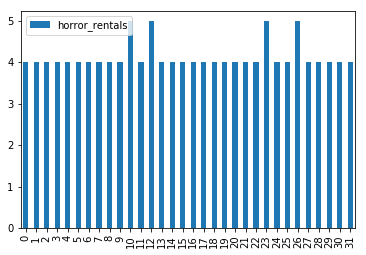

In [29]:
sql = '''
select
    c.first_name,
    c.last_name,
    count(distinct f.film_id) as horror_rentals
from customer c
    join rental r on r.customer_id = c.customer_id
    join inventory i on i.inventory_id = r.inventory_id
    join film f on i.film_id = f.film_id
    join film_category fc on fc.film_id = f.film_id
    join category cat on cat.category_id = fc.category_id
where cat.name = 'Horror'
group by 1,2
having horror_rentals > 3
'''
df = pd.read_sql(sql, db)
df.plot.bar()

## Part C, Question 1k

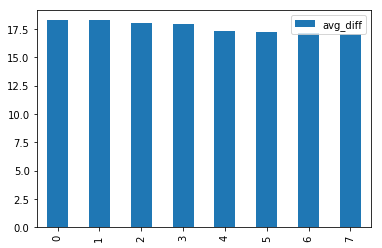

In [38]:
sql = '''
select 
	cat.name,
	avg(f.replacement_cost - f.rental_rate) as avg_diff

from film f
	join film_category fc on fc.film_id = f.film_id
	join category cat on cat.category_id = fc.category_id
group by 1
having avg_diff > 17
order by 2 desc
'''
df = pd.read_sql(sql, db)
df.plot.bar()

## Part C, Question 1j

In [39]:
sql = '''
select 
	cat.name,
    count(distinct f.film_id) film_count
from film f
	join film_category fc on fc.film_id = f.film_id
	join category cat on cat.category_id = fc.category_id
group by 1
having film_count between 55 and 65
order by 2
'''
df = pd.read_sql(sql, db)
df.head()

,name,film_count
0,Horror,56
1,Travel,57
2,Classics,57
3,Comedy,58
4,Children,60


## Part C, Question 2b

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1150599b0>]],
      dtype=object)

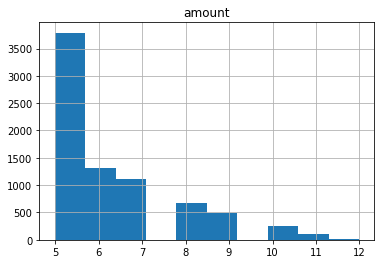

In [40]:
sql = '''
select 
	first_name,
    last_name,
    amount
from customer c
	join payment p on p.customer_id = c.customer_id
where p.amount > (
	select avg(amount)
	from payment)
'''
df = pd.read_sql(sql, db)
df.hist()

## Part C, Question 2d

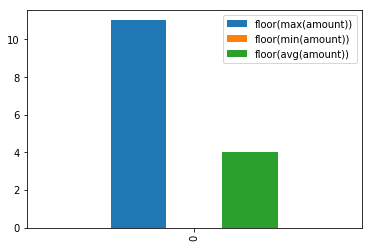

In [37]:
sql = '''
select
    floor(max(amount)),
    floor(min(amount)),
    floor(avg(amount))
from payment
'''
df = pd.read_sql(sql, db)
df.plot.bar()

## Part C, Question 4e

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119e92eb8>]],
      dtype=object)

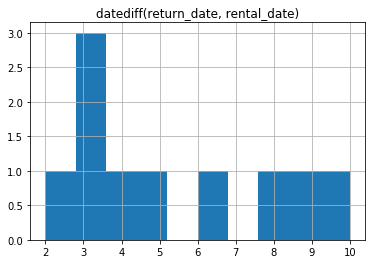

In [36]:
sql = '''
select datediff(return_date, rental_date)
from rental
where return_date is not null
limit 10
'''
df = pd.read_sql(sql, db)
df.hist()

## Part C, Question 5a

In [30]:
sql = '''
select
    year(rental_date) as year,
    week(rental_date) as week,
    count(*) as n_rentals
from rental
group by 1, 2
order by 1, 2
'''
df = pd.read_sql(sql, db)

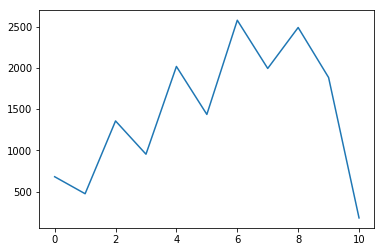

In [33]:
df['n_rentals'].plot()